# Gaussian Mixture Models (GMM)

In [100]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA


## Modeling dengan menggunakan dataset yang di label encoding

### Load dataset dan feature selection dan scaling data

In [101]:
df = pd.read_csv('DataCleanLabel.csv')    
df.head()

features = [                                   
    'FAVC', 'CAEC','FAF','NCP', 'SMOKE', 'SCC', 'FCVC'                  
]

X = df[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Mencari jumlah cluster yang optimal

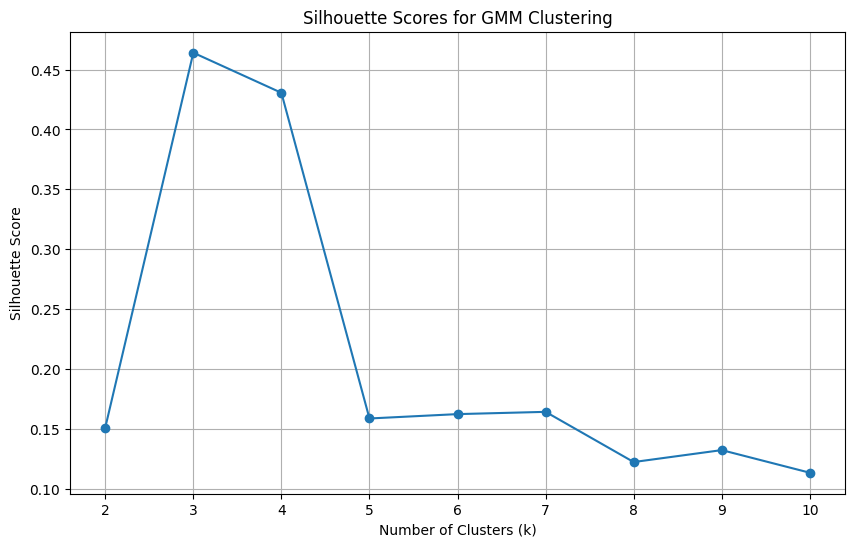

Optimal number of clusters: 3


In [102]:
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for GMM Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')


### Modeling dengan jumlah cluster yang di tentukan


In [103]:
gmm = GaussianMixture(n_components=3, random_state=42)
labels = gmm.fit_predict(X_scaled)
df['Cluster'] = labels

In [104]:
score = silhouette_score(X_scaled, labels)
print(f"GMM Silhouette Score (n=4): {score:.4f}")

GMM Silhouette Score (n=4): 0.4641


## Modeling dengan menggunakan dataset yang di Onehot Encode

### Load dataset dan feature selection dan scaling data

In [105]:
df = pd.read_csv('DataCleanOneHot.csv')
features = [                                   
    'FAVC_yes', 'CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently',
    'FAF','FCVC',                                   
    'NCP', 'SMOKE_yes', 'SCC_yes'                   
]
X = df[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


### Mencari jumlah cluster yang optimal

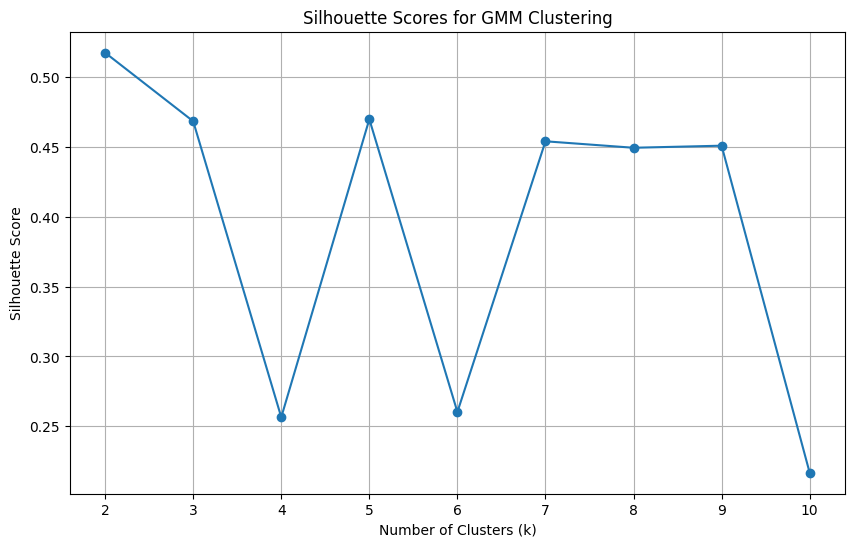

Optimal number of clusters: 2


In [106]:
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for GMM Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')


### Modeling menggunakan jumlah cluster yang di tentukan

In [107]:

gmm = GaussianMixture(n_components=4, random_state=42)
labels = gmm.fit_predict(X_scaled)
df['Cluster_OneHot'] = labels
score = silhouette_score(X_scaled, labels)
print(f"GMM Silhouette Score with One-Hot Encoding : {score:.4f}")

GMM Silhouette Score with One-Hot Encoding : 0.2565


### Modeling dengan menggabungkan dataset yang di onehot dan label encode

### Load dataset dan feature selection dan scaling data

In [108]:
df_onehot = pd.read_csv('DataCleanOneHot.csv')
df_label  = pd.read_csv('DataCleanLabel.csv')
df_onehot.head()
df_label.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


In [109]:
features = [                                   
    'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'CAEC_Frequently',
    'FAF',                                     
    'NCP', 'SMOKE', 'SCC'                   
]


df_features = pd.DataFrame(
   {
      'FCVC' : df_label["FCVC"],
    'FAVC': df_label['FAVC'],
    'FAF': df_label['FAF'],
    'CAEC_Sometimes': df_onehot['CAEC_Sometimes'],
    'CAEC_no': df_onehot['CAEC_no'],
    'CAEC_Frequently': df_onehot['CAEC_Frequently'],
      'FCVC': df_label['FCVC'],
      'NCP': df_label['NCP'],
      'SMOKE': df_label['SMOKE'],
      'SCC': df_label['SCC'],
})


In [110]:
# 3. Scale (MinMax)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_features)

### Menentukan jumlah cluster yang optimal

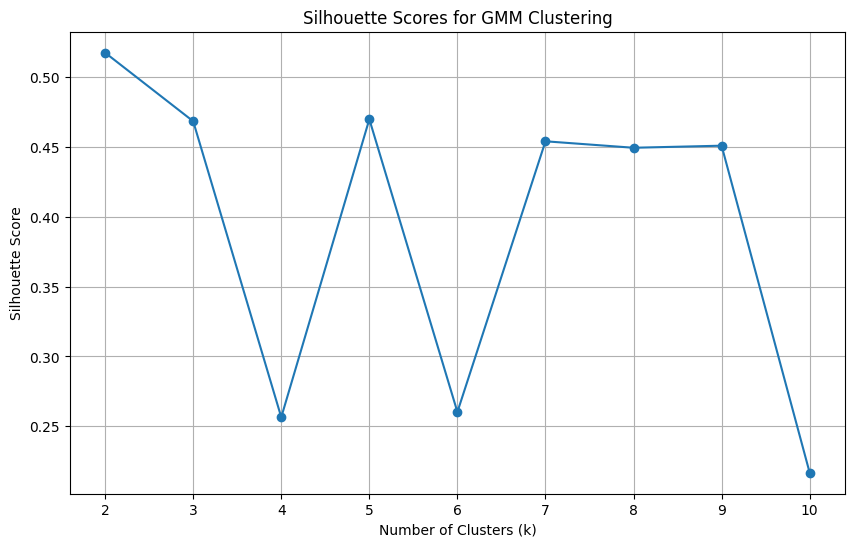

Optimal number of clusters: 2


In [111]:
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for GMM Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')



### Modeling dengan jumlah cluster yang di tentukan

In [112]:
# 4. Train GMM (n=4 components)
gmm = GaussianMixture(n_components=3, random_state=42)
labels = gmm.fit_predict(X_scaled)

In [113]:
# 5. Evaluate
score = silhouette_score(X_scaled, labels)
print(f"GMM Silhouette Score (n=4): {score:.4f}")

GMM Silhouette Score (n=4): 0.4683
